In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from __future__ import division
from scipy import stats
import re

In [2]:
def find_pattern(pattern, behave):
    match = re.search(pattern, behave)
    if match:
        return True
    else:
        return False

In [3]:
def after_request(behave):
    index = behave.rfind('request')
    return behave[index:-1]

In [4]:
def b4_request(behave):
    index = behave.rfind('request')
    return behave[0:index]

In [5]:
def line_plot(y,x_tickLabels = None, y_ticks = None, y_tickLabels = None, title = None):
    plt.style.use('ggplot')
    fig = plt.figure()
    
    ax = fig.add_axes([0,0,1,1])
    plot = ax.plot(np.array(range(len(y))), y)
    
    if title is not None:
        ax.set_title(title)
    
    ax.set_xticks(range(len(y)))
    if x_tickLabels is not None:
        ax.set_xticklabels(x_tickLabels)
    
    if y_ticks is not None:
        ax.set_yticks(y_ticks)
    if y_tickLabels is not None:
        ax.set_yticklabels(y_ticksLabels)

In [6]:
def bar_plot(y,x_tickLabels = None, y_ticks = None, y_tickLabels = None, title = None):
    plt.style.use('ggplot')
    fig = plt.figure()
    
    ax = fig.add_axes([0,0,1,1])
    plot = ax.bar(range(len(y)), y, width = 0.5)
    
    if title is not None:
        ax.set_title(title)
    
    ax.set_xticks(np.array(range(len(y))) + 0.25)
    if x_tickLabels is not None:
        ax.set_xticklabels(x_tickLabels)
    
    if y_ticks is not None:
        ax.set_yticks(y_ticks)
    if y_tickLabels is not None:
        ax.set_yticklabels(y_ticksLabels)

In [40]:
def compare_dif_group_bar(group1, group2, group1_tick, group2_tick, sharey, log = False, title1 = None, title2 = None):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = sharey, figsize = (14,5))
    fig.tight_layout()
    ax1.bar(left = range(len(group1)), height = group1, tick_label = group1_tick, align = 'center', log = log, width = 0.5)
    if title1 is not None:
        ax1.set_title(title1)
    for i,v in enumerate(group1):
        ax1.text(x = i - 0.25, y = v + 0.02, s = str(v))
    ax2.bar(left = range(len(group2)), height = group2, tick_label = group2_tick, align = 'center', log = log, width = 0.5)
    if title2 is not None:
        ax2.set_title(title2)
    for i,v in enumerate(group2):
        ax2.text(x = i - 0.25, y = v + 0.02, s = str(v))

In [8]:
def compare_groups_bar(groups, group_ticks,sharey, titles, log = False):
    fig, axes = plt.subplots(ncols = len(groups), sharey = sharey, figsize = (12,5))
    fig.tight_layout()
    for i in xrange(len(groups)):
        axes[i].bar(left = range(len(groups[i])), height = groups[i], tick_label = group_ticks[i], align = 'center', log = log)
        axes[i].set_title(titles[i])
        for j,v in enumerate(groups[i]):
            axes[i].text(x = (j - 0.25), y = v + 0.02, s = str(v))

In [9]:
def chi_square_test(table, nul_hyp, alt_hyp, sig_level = 0.05):
    x_square, p_value, df, expected_fre = stats.chi2_contingency(table)
    print 'x_sqaure statistics is ', x_square
    print 'p_value is ', p_value
    print 'significant level is ', sig_level
    if p_value < sig_level:
        print alt_hyp
    else:
        print nul_hyp

# What's our conversion ratio?
    it's ratio of # of users signing up successfully to total number of users

In [10]:
df = pd.read_csv('data/users_data_whole_behavior.csv')

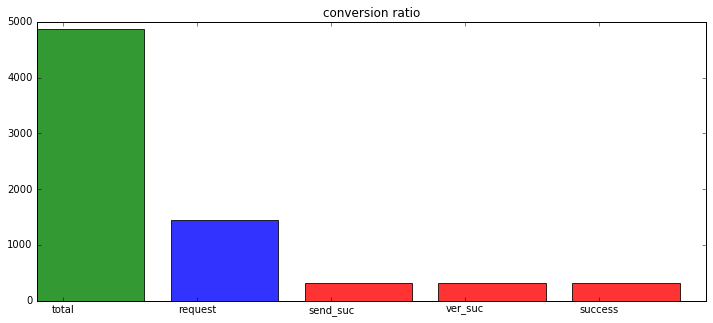

In [25]:
total = df.shape[0]
request = df[(df.request > 0)].shape[0]
send_suc = df[(df.send_suc == 1)].shape[0]
ver_suc = df[(df.ver_suc == 1)].shape[0]
success = df[(df.isSuccess == 1)].shape[0]

conversion = [total, request, send_suc, ver_suc, success]
title = 'conversion ratio'
x_tickLable = ['total', 'request', 'send_suc','ver_suc', 'success']
y_ticks = conversion
fig, ax = plt.subplots(figsize = (12,5))
# ax.plot(np.array(range(len(conversion))), conversion, color = 'purple')
ax.bar(np.array(range(len(conversion))), conversion, width = 0.8, color = ('green', 'blue', 'red', 'red', 'red'),alpha=0.8)
ax.set_title(title)
ax.set_xticks(np.arange(5) + 0.2)
ax.set_xticklabels(x_tickLable)


# Get insight into users' behavior pattern

## first we look at patterns from start to request

#### dive into pages with application button

In [26]:
index_pat = r'btnpage_index, request'
demo_pat = r'btnpage_demo, request'
about_pat = r'btnpage_about, request'
play_pat = r'play_video.*request'

In [27]:
index_request_df = sum(df.behavior_list.apply(lambda x: find_pattern(index_pat,x)))
index_not_request_df = sum((df.behavior_list.apply(lambda x: 'btnpage_index' in x))
                         & (df.behavior_list.apply(lambda x: 'request' not in x)))

In [28]:
demo_request = sum(df.behavior_list.apply(lambda x: find_pattern(demo_pat,x)))
demo_not_request = sum((df.behavior_list.apply(lambda x: 'btnpage_demo' in x))
                         & (df.behavior_list.apply(lambda x: 'request' not in x)))

In [29]:
about_request = sum(df.behavior_list.apply(lambda x: find_pattern(about_pat,x)))
about_not_request = sum((df.behavior_list.apply(lambda x: 'btnpage_about' in x)) 
                         & (df.behavior_list.apply(lambda x: 'request' not in x)))

In [30]:
play_request = sum(df.behavior_list.apply(lambda x: find_pattern(play_pat,x)))
play_not_request = sum((df.behavior_list.apply(lambda x: 'play_video' in x)) 
                         & (df.behavior_list.apply(lambda x: 'request' not in x)))

In [31]:
request = [index_request_df,demo_request,about_request,play_request]
not_request = [index_not_request_df,demo_not_request,about_not_request,play_not_request]

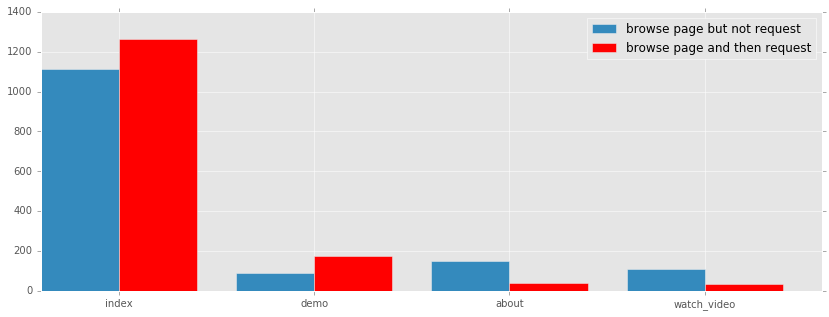

In [94]:
xlabel = ['index', 'demo', 'about', 'watch_video']
fig, ax = plt.subplots(figsize = (14,5))
ax.bar(left = range(1,5), height = not_request, width = 0.4, label = 'browse page but not request')
ax.bar(left = np.arange(1, 5) + 0.4, height = request, width = 0.4, color = 'red', label = 'browse page and then request')
ax.set_xticks(np.arange(1,5) + 0.4)
ax.set_xticklabels(xlabel)
ax.legend()

### let's look at demo

In [33]:
no_demo_not_request = df[(df.behavior_list.apply(lambda x: 'btnpage_demo' not in x)) 
                         & (df.behavior_list.apply(lambda x: 'request' not in x))].shape[0]
no_demo_request = df[(df.behavior_list.apply(lambda x: 'btnpage_demo' not in x)) 
                         & (df.behavior_list.apply(lambda x: 'request' in x))].shape[0]

In [34]:
demo = [demo_not_request, demo_request]
no_demo = [no_demo_not_request, no_demo_request]

demo_tick = ('demo_not_request', 'demo_request')
no_demo_tick = ('no_demo_not_request', 'no_demo_request')

demo_tit = 'number of users signing or not watching demo'
no_demo_tit = 'number of users signing or not without demo'

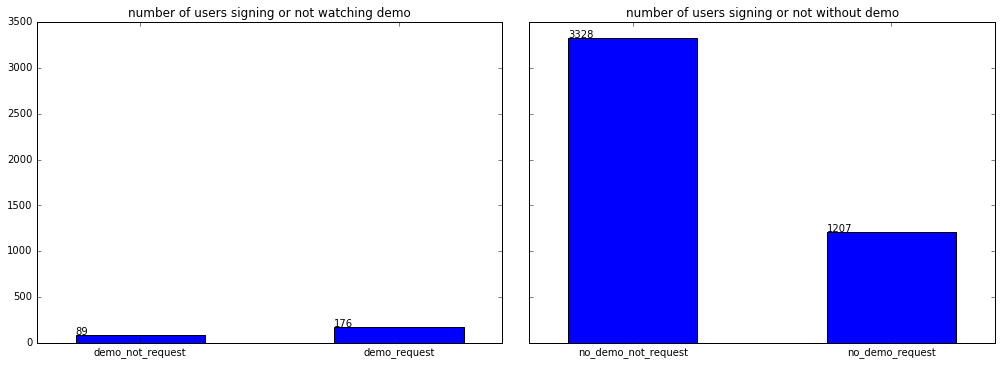

In [35]:
compare_dif_group_bar(demo, no_demo, demo_tick, no_demo_tick, sharey = True, title1 = demo_tit, title2 = no_demo_tit)

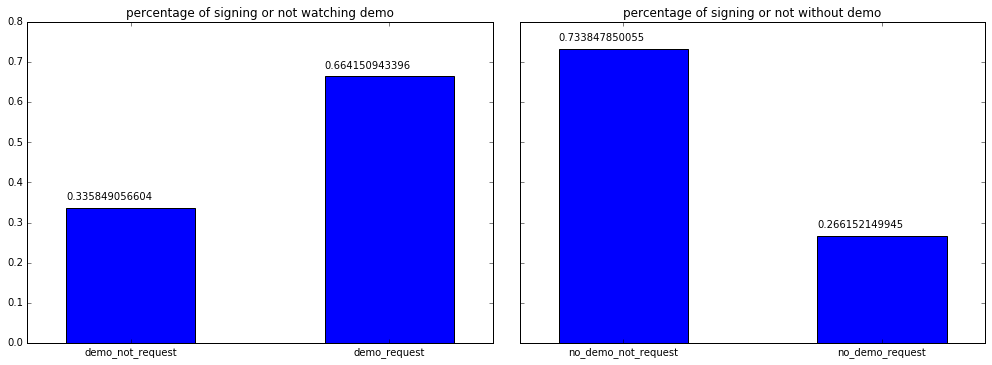

In [41]:
demo_ratio = [demo_not_request/(demo_not_request + demo_request), demo_request/(demo_not_request + demo_request)]
no_demo_ratio = [no_demo_not_request/(no_demo_not_request + no_demo_request), no_demo_request/((no_demo_not_request + no_demo_request))]
title1 = 'percentage of signing or not watching demo'
title2 = 'percentage of signing or not without demo'
compare_dif_group_bar(demo_ratio, no_demo_ratio, demo_tick, no_demo_tick, sharey = True, title1 = title1, title2 = title2)

    use chi-square test to test it , it's subject to assumption of chi-square test
        randomly sampled, 
        related to categorical features 
        number in each cell of contincy table is more than 5

In [37]:
demo_or_not_table = np.array([[demo_not_request, demo_request],[no_demo_not_request, no_demo_request]])
nul_hyp = 'there is no difference between watching demo or not impacting on signing up'
alt_hyp = 'there is significant difference between watching demo or not impacting on signing up'
chi_square_test(demo_or_not_table, nul_hyp = nul_hyp, alt_hyp = alt_hyp)

x_sqaure statistics is  191.421823234
p_value is  1.55590714734e-43
significant level is  0.05
there is significant difference between watching demo or not impacting on signing up


## second, let's look at about 

In [42]:
no_about_not_request = df[(df.behavior_list.apply(lambda x: 'btnpage_about' not in x)) 
                         & (df.behavior_list.apply(lambda x: 'request' not in x))].shape[0]
no_about_request = df[(df.behavior_list.apply(lambda x: 'btnpage_about' not in x)) 
                         & (df.behavior_list.apply(lambda x: 'request' in x))].shape[0]

In [43]:
about = [about_not_request, about_request]
no_about = [no_about_not_request, no_about_request]

about_tick = ('about_not_request', 'about_request')
no_about_tick = ('no_about_not_request', 'no_about_request')

about_tit = 'number of users signing or not watching about'
no_about_tit = 'number of users signing or not without about'

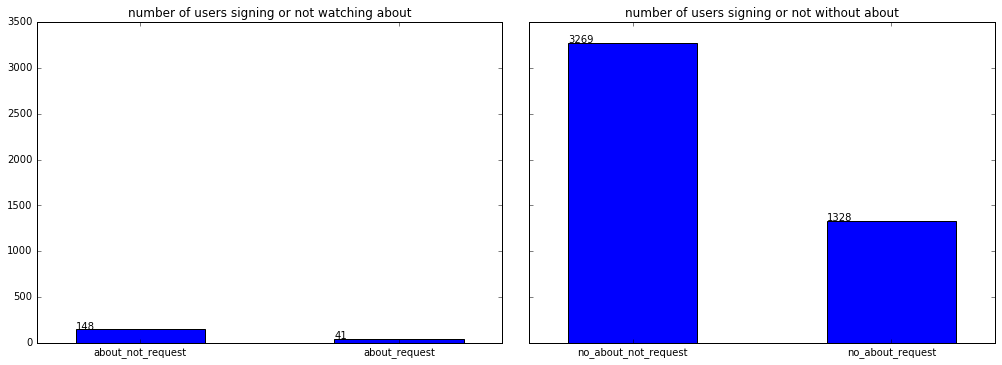

In [44]:
compare_dif_group_bar(about, no_about, about_tick, no_about_tick, sharey = True, title1 = about_tit, title2 = no_about_tit)

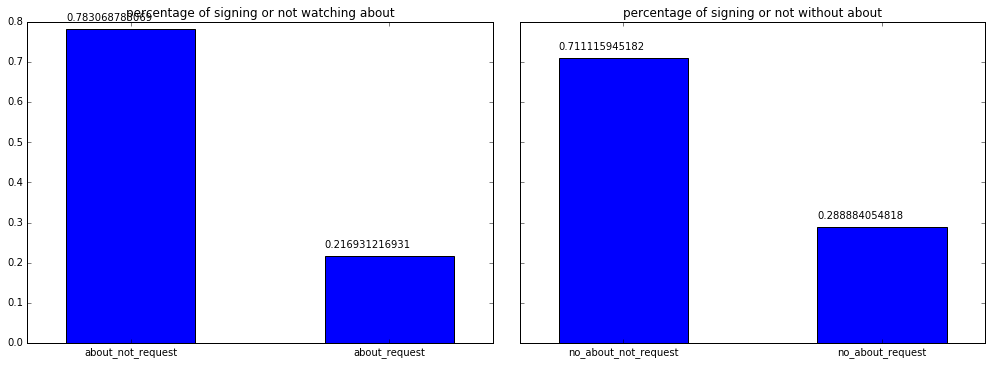

In [45]:
about_ratio = [about_not_request/(about_not_request + about_request), about_request/(about_not_request + about_request)]
no_about_ratio = [no_about_not_request/(no_about_not_request + no_about_request), no_about_request/((no_about_not_request + no_about_request))]
title1 = 'percentage of signing or not watching about'
title2 = 'percentage of signing or not without about'
compare_dif_group_bar(about_ratio, no_about_ratio, about_tick, no_about_tick, sharey = True, title1 = title1, title2 = title2)

    use chi-square test to test it , it's subject to assumption of chi-square test
        randomly sampled, 
        related to categorical features 
        number in each cell of contincy table is more than 5

In [47]:
about_or_not_table = np.array([[about_not_request, about_request],[no_about_not_request, no_about_request]])
nul_hyp = 'there is no difference between watching about or not impacting on signing up'
alt_hyp = 'there is significant difference between watching about or not impacting on signing up'
chi_square_test(about_or_not_table, nul_hyp = nul_hyp, alt_hyp = alt_hyp)

x_sqaure statistics is  4.25652117224
p_value is  0.0390999154308
significant level is  0.05
there is significant difference between watching about or not impacting on signing up


## third, let's look at video

### Although someone is at video page, he/she didn't actually watch video

In [48]:
no_video_not_request = sum((df.behavior_list.apply(lambda x: 'courses' not in x))
                           & (df.behavior_list.apply(lambda x: 'play_video' not in x))
                           & (df.behavior_list.apply(lambda x: 'courses_index' not in x))
                           & (df.behavior_list.apply(lambda x: 'request' not in x))
                          )
no_video_request = sum((df.behavior_list.apply(lambda x: 'courses' not in x))
                           & (df.behavior_list.apply(lambda x: 'play_video' not in x))
                           & (df.behavior_list.apply(lambda x: 'courses_index' not in x))
                           & (df.behavior_list.apply(lambda x: 'request' in x))
                          )

videoPage_not_request = sum(((df.behavior_list.apply(lambda x: 'courses' in x)) 
                             | (df.behavior_list.apply(lambda x: 'courses_index' in x)))
                           & (df.behavior_list.apply(lambda x: 'play_video' not in x))
                           & (df.behavior_list.apply(lambda x: 'request' not in x))
                          )

videoPage_request = sum(((df.behavior_list.apply(lambda x: find_pattern(r'\scourses,.*request', x))) 
                             | (df.behavior_list.apply(lambda x: find_pattern(r'\scourses_index,.*request', x))))
                           & (df.behavior_list.apply(lambda x: 'play_video' not in x))
                          )

play_video_request = sum((df.behavior_list.apply(lambda x: find_pattern('\splay_video,.*request',x))))

play_video_not_request = sum((df.behavior_list.apply(lambda x: 'play_video' in x))
                           & (df.behavior_list.apply(lambda x: 'request' not in x))
                          )

In [49]:
no_video = [no_video_not_request, no_video_request]
video_page = [videoPage_not_request, videoPage_request]
play = [play_video_request, play_video_not_request]

no_video_tick = ('no_video_not_request', 'no_video_request')
video_page_tick = ('videoPage_not_request', 'videoPage_request')
play_tick = ('play_not_request', 'play_request')

no_video_tit = 'number of users signing or not without video'
video_page_tit = 'number of users signing or not on video page'
play_tit = 'number of users signing or not watching video'

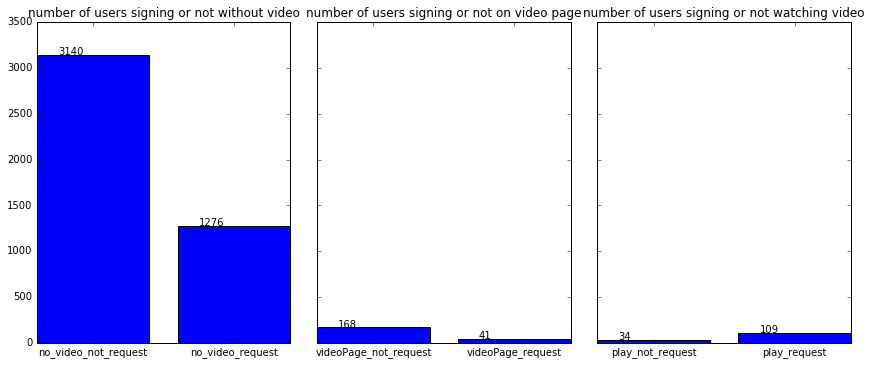

In [50]:
compare_groups_bar(groups = (no_video,video_page, play), 
                   group_ticks = (no_video_tick,video_page_tick, play_tick), 
                   sharey = True, titles = (no_video_tit,video_page_tit,play_tit)
                  )

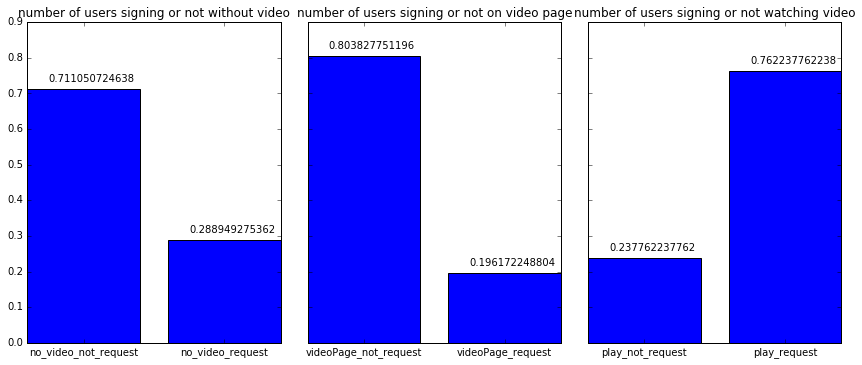

In [51]:
no_video_ratio = [no_video[0]/ sum(no_video), no_video[1] / sum(no_video)]
video_page_ratio = [video_page[0]/ sum(video_page), video_page[1] / sum(video_page)]
play_ratio = [play[0]/ sum(play), play[1] / sum(play)]

title1 = 'percentage of signing or not without video'
title2 = 'percentage of signing or not just on video page'
title3 = 'percentage of signing or not watching video'

compare_groups_bar(groups = (no_video_ratio,video_page_ratio, play_ratio), 
                   group_ticks = (no_video_tick,video_page_tick, play_tick), 
                   sharey = True, titles = (no_video_tit,video_page_tit,play_tit)
                  )

    use chi-square test to test it , it's subject to assumption of chi-square test
        randomly sampled, 
        related to categorical features 
        number in each cell of contincy table is more than 5

In [52]:
video_table = np.array([no_video,video_page, play])
nul_hyp = 'there is no difference in video impacting on signing up'
alt_hyp = 'there is significant difference in video impacting on signing up'
chi_square_test(video_table, nul_hyp = nul_hyp, alt_hyp = alt_hyp)

x_sqaure statistics is  159.05256844
p_value is  2.89850195047e-35
significant level is  0.05
there is significant difference in video impacting on signing up


#### Dive into pages without directly access to application

In [ ]:
prod_pat = r'cli_product.*request'
brou_pat = r'cli_bround.*request'
docu_pat = r'cli_document.*request'

## let's look at patterns after request

In [53]:
request_not_sign_df = df[(df.behavior_list.apply(lambda x: 'request' in x)
                         & (df.behavior_list.apply(lambda x: 'click_send_cellphone' not in x)))]
request_sign_df = df[(df.behavior_list.apply(lambda x: 'click_send_cellphone' in x))]

([<matplotlib.axis.XTick at 0x105f62b0>, <matplotlib.axis.XTick at 0xd198240>],
 <a list of 2 Text xticklabel objects>)

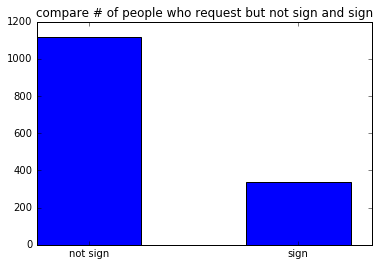

In [54]:
plt.bar(left = (0,1), height = (request_not_sign_df.shape[0], request_sign_df.shape[0]), 
        width = 0.5)
plt.title('compare # of people who request but not sign and sign')
plt.xticks(np.arange(2) + 0.25, ('not sign', 'sign'))

In [55]:
after_req_not_sign = request_not_sign_df.behavior_list.apply(lambda x: after_request(x))
b4_req_not_sign = request_not_sign_df.behavior_list.apply(lambda x: b4_request(x))

after_req_sign = request_sign_df.behavior_list.apply(lambda x: after_request(x))
b4_req_sign = request_sign_df.behavior_list.apply(lambda x: b4_request(x))

In [56]:
after_req_not_num_oper = np.median(after_req_not_sign.apply(lambda x: len(x.split(', '))).values)
b4_req_not_num_oper = np.median(b4_req_not_sign.apply(lambda x: len(x.split(', '))).values)

after_req_sign_num_oper = np.median(after_req_sign.apply(lambda x: len(x.split(', '))).values - 4)
b4_req_sign_num_oper = np.median(b4_req_sign.apply(lambda x: len(x.split(', '))).values)

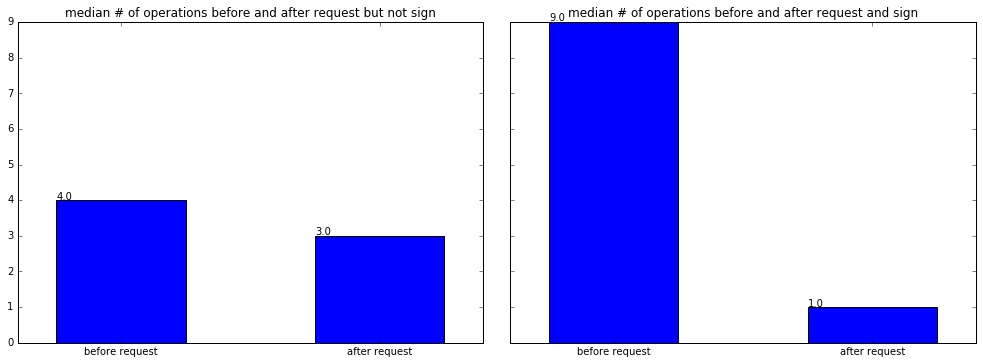

In [57]:
compare_dif_group_bar((b4_req_not_num_oper,after_req_not_num_oper), 
                      (b4_req_sign_num_oper, after_req_sign_num_oper),
                      group1_tick = ('before request','after request'),
                      group2_tick = ('before request','after request'),
                      sharey = True,
                      title1 = 'median # of operations before and after request but not sign',
                      title2 = 'median # of operations before and after request and sign')

    so we find most of users just scan a few pages and click request but finally choose not to sign.
    While others who scan a lot of pages and click request are more likely to sign.

# Classify users into different cases
    1. Not interested, just viewed page once and left (we don't need to pay attention to this group of users)
    2. Interested(viewed multi-pages)
            a. choose not to sign up
            b. choose to sign up(btnClick and request)
                    i. successed
                    ii. failed  
    As follows, data contains old users who are willing to sign up(name = request) and new users with more than twice actions.

In [58]:
df.project.value_counts(dropna = False)

None            4853
[default]         12
[production]       2
[hunter]           1
Name: project, dtype: int64

# What features can impact on signing up or not

In [59]:
df.shape

(4868, 67)

In [60]:
df.columns

Index([u'dis_id', u'new_user', u'browser', u'ip', u'os', u'behavior_list',
       u'request', u'cli_demo', u'cli_product', u'cli_document', u'cli_bround',
       u'last_name', u'cli_about', u'cli_blog', u'cli_video', u'cli_logo',
       u'cli_mail', u'event_order', u'$pageview', u'btnClick',
       u'click_send_cellphone', u'verify_cellphone_code', u'index_leave',
       u'clickSubmit', u'demo_leave', u'about_leave', u'courses_leave',
       u'formSubmit', u'page_close', u'courses_play_leave', u'page_order',
       u'tot_page_time', u'homepage', u'demo', u'lookmanual', u'index',
       u'product', u'about', u'bround', u'manual', u'tool', u'courses',
       u'tools_page_close', u'play_video', u'share', u'project',
       u'num_project', u'latest_utm_source', u'latest_utm_medium',
       u'session_referrer_host', u'ref_host_pageview', u'url_to_submit', u'Mo',
       u'Tu', u'We', u'Th', u'Fr', u'Sa', u'Su', u'wrong_num', u'less_1min',
       u'send_suc', u'wrong_code', u'no_num', u'ver_s

###    Chrome VS others

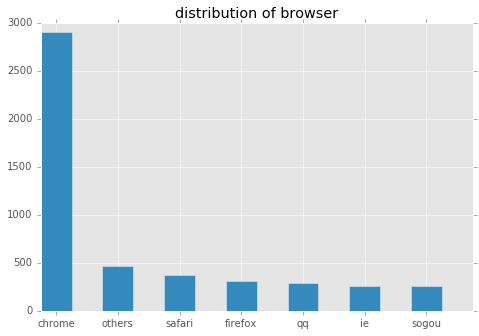

In [61]:
browser_count = df.browser.value_counts()
x_tickLabel = browser_count.index
y = browser_count.values
title = 'distribution of browser'
bar_plot(y = y, x_tickLabels = x_tickLabel, title = title)

In [62]:
chrome_not = df[(df.browser == 'chrome') & (df.isSuccess == 0)].shape[0]
chrome_sign = df[(df.browser == 'chrome') & (df.isSuccess == 1)].shape[0]
other_not = df[(df.browser != 'chrome') & (df.isSuccess == 0)].shape[0]
other_sign = df[(df.browser != 'chrome')  & (df.isSuccess == 1)].shape[0]

In [63]:
chrome = [chrome_not, chrome_sign]
other = [other_not, other_sign]
chrome_tick = ('chrom_not_sign', 'chrome_sign')
other_tick = ('other_not_sign', 'other_sign')

chrome_tit = 'number of users signing or not with Chrome'
other_tit = 'number of users signing or not with other browsers'

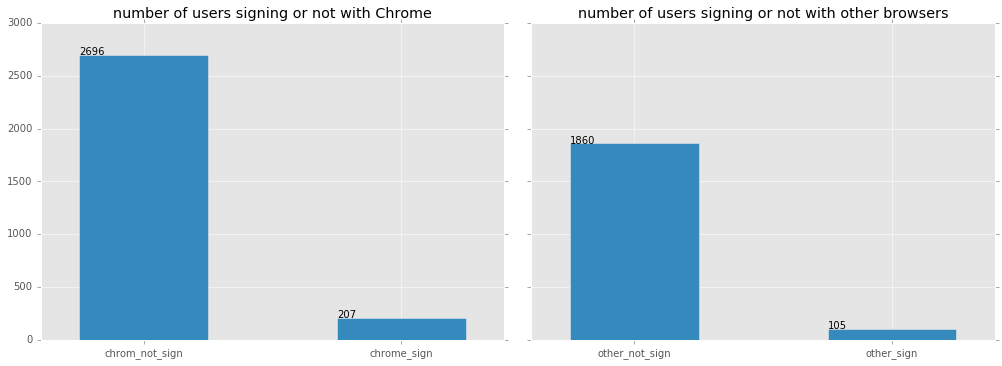

In [64]:
compare_dif_group_bar(chrome, other, chrome_tick, other_tick, sharey = True, title1 = chrome_tit, title2 = other_tit)

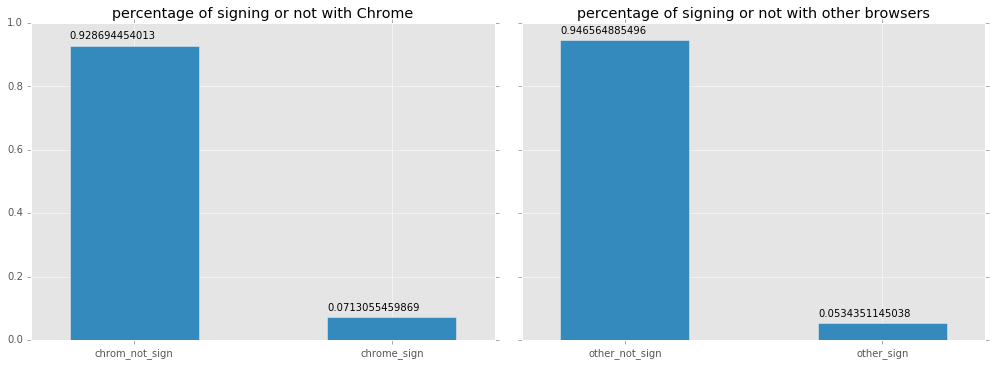

In [65]:
chrome_ratio = [chrome_not/(chrome_not + chrome_sign), chrome_sign/(chrome_not + chrome_sign)]
other_ratio = [other_not/(other_not + other_sign), other_sign/((other_not + other_sign))]
title1 = 'percentage of signing or not with Chrome'
title2 = 'percentage of signing or not with other browsers'
compare_dif_group_bar(chrome_ratio, other_ratio, chrome_tick, other_tick, sharey = True, title1 = title1, title2 = title2)

    use chi-square test to test it , it's subject to assumption of chi-square test
        randomly sampled, 
        related to categorical features 
        number in each cell of contincy table is more than 5

In [66]:
chrome_other_table = np.array([[chrome_not, chrome_sign],[other_not, other_sign]])
nul_hyp = 'there is no difference between chrome and other browsers impacting on signing up'
alt_hyp = 'there is significant difference between chrome and other browsers impacting on signing up'
chi_square_test(chrome_other_table, nul_hyp = nul_hyp, alt_hyp = alt_hyp)

x_sqaure statistics is  5.94430666874
p_value is  0.0147648978756
significant level is  0.05
there is significant difference between chrome and other browsers impacting on signing up


# os

In [68]:
df.os.value_counts(dropna = False)

windows    3517
macosx      864
Android     279
iOS         182
linux        23
na            3
Name: os, dtype: int64

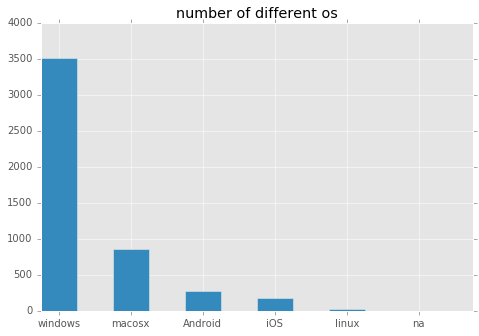

In [69]:
os_count = df.os.value_counts()
x_tickLabel = os_count.index
y = os_count.values
title = 'number of different os'
bar_plot(y = y, x_tickLabels = x_tickLabel, title = title)

In [70]:
wind_not = df[(df.os == 'windows') &  (df.isSuccess == 0)].shape[0]
wind_sign = df[(df.os == 'windows') & (df.isSuccess == 1)].shape[0]

mac_not = df[(df.os == 'macosx') & (df.isSuccess == 0)].shape[0]
mac_sign = df[(df.os == 'macosx') & (df.isSuccess == 1)].shape[0]

and_not = df[(df.os == 'Android') & (df.isSuccess == 0)].shape[0]
and_sign = df[(df.os == 'Android')  & (df.isSuccess == 1)].shape[0]

ios_not = df[(df.os == 'iOS') & (df.isSuccess == 0)].shape[0]
ios_sign = df[(df.os == 'iOS')  & (df.isSuccess == 1)].shape[0]

#### first we compare laptop and phone

In [71]:
laptop = [wind_not + mac_not, wind_sign + mac_sign]
phone = [ios_not + and_not, ios_sign + and_sign]

laptop_tick = ('laptop_not_sign', 'laptop_sign')
phone_tick = ('phone_not_sign', 'phone_sign')

laptop_tit = 'number of users signing or not with laptop'
phone_tit = 'number of users signing or not with phone'

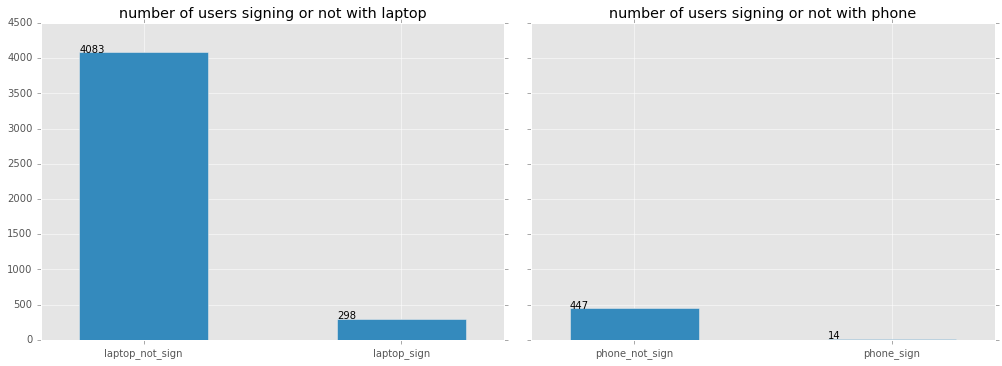

In [72]:
compare_dif_group_bar(laptop, phone, laptop_tick, phone_tick, sharey = True, title1 = laptop_tit, title2 = phone_tit)

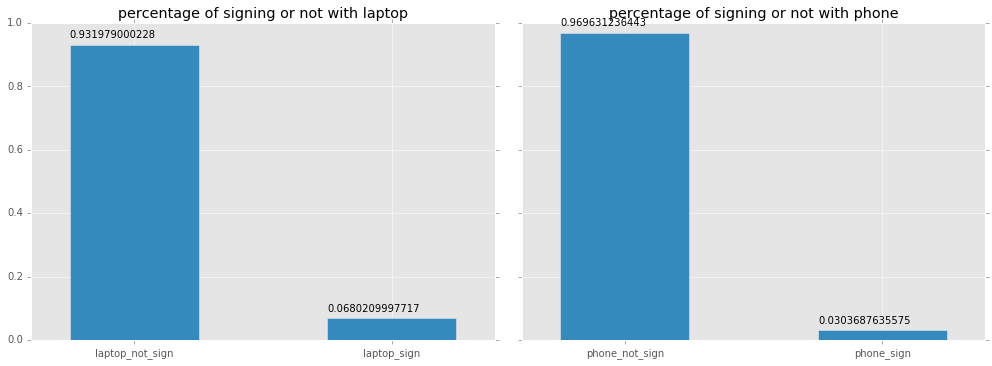

In [73]:
laptop_ratio = [laptop[0] / sum(laptop), laptop[1] / sum(laptop)]
phone_ratio = [phone[0] / sum(phone), phone[1] / sum(phone)]

lap_tit = 'percentage of signing or not with laptop'
pho_tit = 'percentage of signing or not with phone'

compare_dif_group_bar(laptop_ratio, phone_ratio, laptop_tick, phone_tick,sharey = True, title1 = lap_tit, title2 = pho_tit)

    use chi-square test to test it , it's subject to assumption of chi-square test
        randomly sampled, 
        related to categorical features 
        number in each cell of contincy table is more than 5

In [74]:
lap_phone_table = np.array([laptop, phone])
nul_hyp = 'there is no difference between laptop and phone impacting on signing up'
alt_hyp = 'there is significant difference between laptop and phone impacting on signing up'
chi_square_test(lap_phone_table, nul_hyp = nul_hyp, alt_hyp = alt_hyp)

x_sqaure statistics is  9.19443042548
p_value is  0.0024275261384
significant level is  0.05
there is significant difference between laptop and phone impacting on signing up


#### second, we compare windows and mac

####    third, we can compare Andriod and iOS

### As for latest_utm_source

In [75]:
df.latest_utm_source.value_counts(dropna = False)

baidu     3138
NaN       1391
others     284
google      45
wechat      10
Name: latest_utm_source, dtype: int64

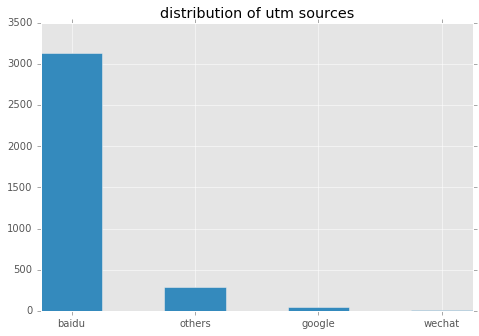

In [76]:
utm_source_count = df.latest_utm_source.value_counts()
x_tickLabel = utm_source_count.index
y = utm_source_count.values
title = 'distribution of utm sources'
bar_plot(y = y, x_tickLabels = x_tickLabel, title = title)

In [77]:
baidu_not = df[(df.latest_utm_source == 'baidu') & (df.isSuccess == 0)].shape[0]
baidu_sign = df[(df.latest_utm_source == 'baidu') & (df.isSuccess == 1)].shape[0]

al_other_not = df[(df.latest_utm_source != 'baidu') & (df.latest_utm_source.notnull()) & (df.isSuccess == 0)].shape[0]
al_other_sign = df[(df.latest_utm_source != 'baidu') & (df.latest_utm_source.notnull()) & (df.isSuccess == 1)].shape[0]

In [78]:
baidu = [baidu_not, baidu_sign]
al_other = [al_other_not, al_other_sign]

baidu_tick = ('baidu_not_sign', 'baidu_sign')
al_other_tick = ('al_other_not_sign', 'al_other_sign')

baidu_tit = 'number of users signing or not with baidu'
al_other_tit = 'number of users signing or not with other search engine'

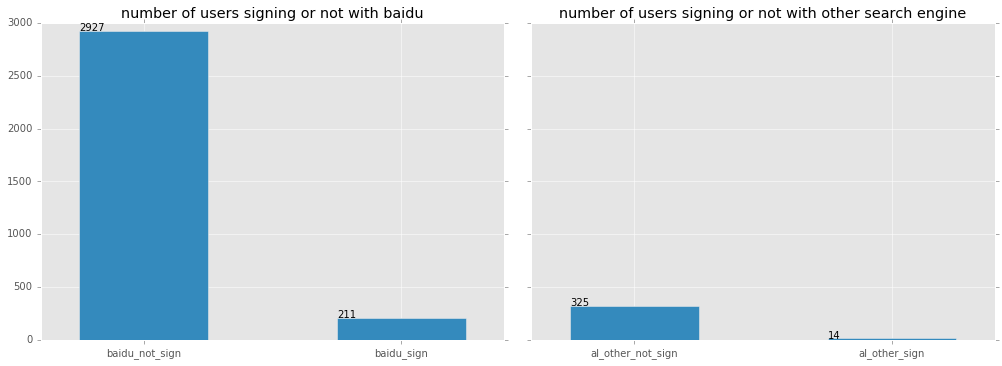

In [79]:
compare_dif_group_bar(baidu, al_other, baidu_tick, al_other_tick, sharey = True, title1 = baidu_tit, title2 = al_other_tit)

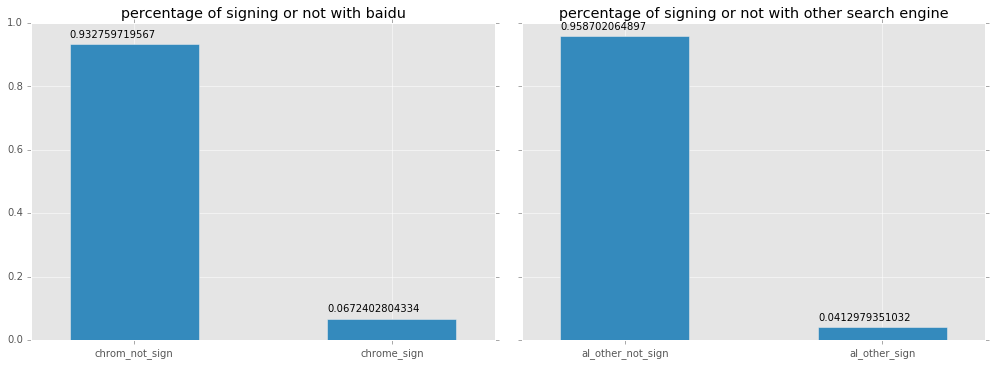

In [80]:
baidu_ratio = [baidu_not/(baidu_not + baidu_sign), baidu_sign/(baidu_not + baidu_sign)]
al_other_ratio = [al_other_not/(al_other_not + al_other_sign), al_other_sign/((al_other_not + al_other_sign))]
title1 = 'percentage of signing or not with baidu'
title2 = 'percentage of signing or not with other search engine'
compare_dif_group_bar(baidu_ratio, al_other_ratio, chrome_tick, al_other_tick, sharey = True, title1 = title1, title2 = title2)

    use chi-square test to test it , it's subject to assumption of chi-square test
        randomly sampled, 
        related to categorical features 
        number in each cell of contincy table is more than 5

In [81]:
baidu_other_table = np.array([[baidu_not, baidu_sign],[al_other_not, al_other_sign]])
nul_hyp = 'there is no difference between baidu and other search engine impacting on signing up'
alt_hyp = 'there is significant difference between baidu and other search engine impacting on signing up'
chi_square_test(baidu_other_table, nul_hyp = nul_hyp, alt_hyp = alt_hyp)

x_sqaure statistics is  2.9869342008
p_value is  0.0839389471998
significant level is  0.05
there is no difference between baidu and other search engine impacting on signing up


### As for utm_medium

In [82]:
df.latest_utm_medium.value_counts(dropna = False)

cpc        2950
NaN        1417
mcpc        392
mfeed       100
default       7
other         2
Name: latest_utm_medium, dtype: int64

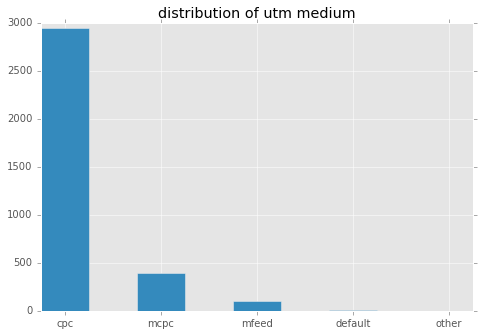

In [83]:
utm_medium_count = df.latest_utm_medium.value_counts()
x_tickLabel = utm_medium_count.index
y = utm_medium_count.values
title = 'distribution of utm medium'
bar_plot(y = y, x_tickLabels = x_tickLabel, title = title)

In [84]:
cpc_not = df[(df.latest_utm_medium == 'cpc') & (df.isSuccess == 0)].shape[0]
cpc_sign = df[(df.latest_utm_medium == 'cpc') & (df.isSuccess == 1)].shape[0]

al_other_not = df[(df.latest_utm_medium != 'cpc') & (df.latest_utm_medium.notnull()) & (df.isSuccess == 0)].shape[0]
al_other_sign = df[(df.latest_utm_medium != 'cpc') & (df.latest_utm_medium.notnull()) & (df.isSuccess == 1)].shape[0]

In [85]:
cpc = [cpc_not, cpc_sign]
al_other = [al_other_not, al_other_sign]

cpc_tick = ('cpc_not_sign', 'cpc_sign')
al_other_tick = ('al_other_not_sign', 'al_other_sign')

cpc_tit = 'number of users signing or not with cpc'
al_other_tit = 'number of users signing or not with other medium'

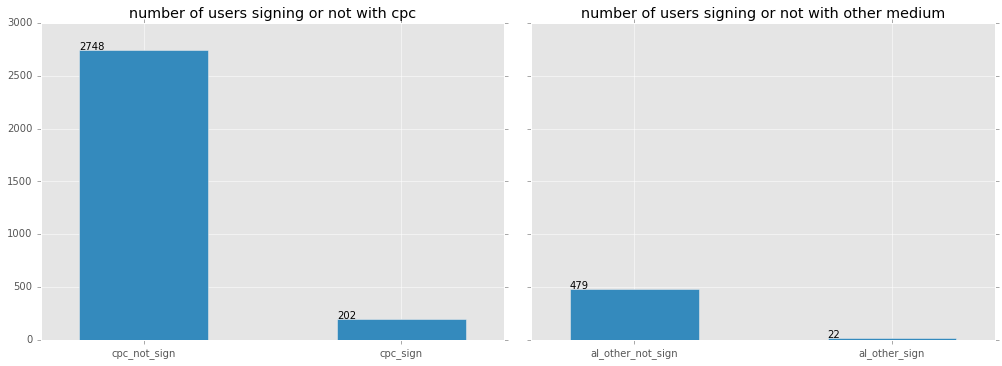

In [86]:
compare_dif_group_bar(cpc, al_other, cpc_tick, al_other_tick, sharey = True, title1 = cpc_tit, title2 = al_other_tit)

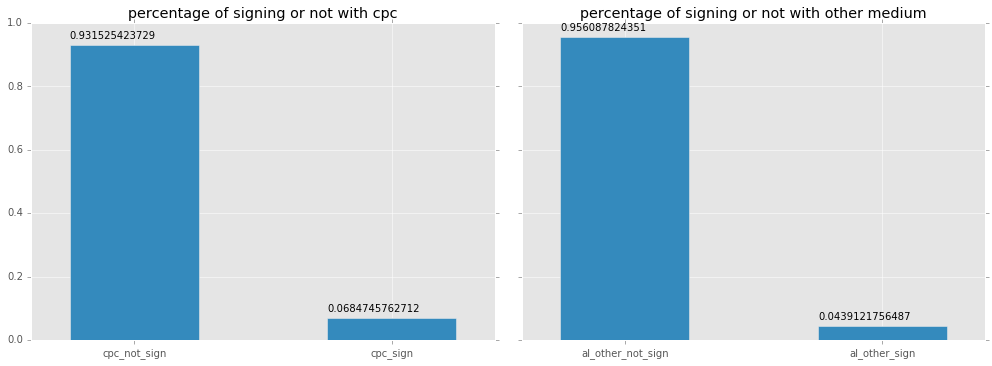

In [87]:
cpc_ratio = [cpc_not/(cpc_not + cpc_sign), cpc_sign/(cpc_not + cpc_sign)]
al_other_ratio = [al_other_not/(al_other_not + al_other_sign), al_other_sign/((al_other_not + al_other_sign))]
title1 = 'percentage of signing or not with cpc'
title2 = 'percentage of signing or not with other medium'
compare_dif_group_bar(cpc_ratio, al_other_ratio, cpc_tick, al_other_tick, sharey = True, title1 = title1, title2 = title2)

    use chi-square test to test it , it's subject to assumption of chi-square test
        randomly sampled, 
        related to categorical features 
        number in each cell of contincy table is more than 5

In [88]:
cpc_other_table = np.array([[cpc_not, cpc_sign],[al_other_not, al_other_sign]])
nul_hyp = 'there is no difference between cpc and other medium impacting on signing up'
alt_hyp = 'there is significant difference between baidu and other medium impacting on signing up'
chi_square_test(cpc_other_table, nul_hyp = nul_hyp, alt_hyp = alt_hyp)

x_sqaure statistics is  3.86189350236
p_value is  0.0493945539362
significant level is  0.05
there is significant difference between baidu and other medium impacting on signing up


# let's train logistic regression model to predict whether a user choose to request and if he/she finally sign up

In [ ]:
# df.columns

## first we predict if a user will sign up

In [ ]:
# choose useful features for training 
drop_label = ['dis_id', 'ip', 'behavior_list', 'last_name', 'event_order', 
              'click_send_cellphone', 'verify_cellphone_code',u'formSubmit',
              'clickSubmit', u'page_order', u'less_1min', 'url_to_submit','wrong_num',
              'send_suc', u'wrong_code', u'no_num', u'ver_suc',u'num_fail_submit', u'isSuccess']
request_df = df.drop(labels = drop_label, axis = 1)

In [ ]:
# convert some columns into categorical features
request_df.browser = request_df.browser.astype('category').cat.codes
request_df.os = request_df.os.astype('category').cat.codes
request_df.project = request_df.project.astype('category').cat.codes

request_df.latest_utm_source.fillna('None')
request_df.latest_utm_source = request_df.latest_utm_source.astype('category').cat.codes

request_df.latest_utm_medium.fillna('None')
request_df.latest_utm_medium = request_df.latest_utm_medium.astype('category').cat.codes

request_df.session_referrer_host.fillna('None')
request_df.session_referrer_host = request_df.session_referrer_host.astype('category').cat.codes

request_df.ref_host_pageview.fillna('None')
request_df.ref_host_pageview = request_df.ref_host_pageview.astype('category').cat.codes

In [ ]:
X = request_df[[u'new_user', u'browser', u'os', u'cli_demo', u'cli_product',
       u'cli_document', u'cli_bround', u'cli_about', u'cli_blog', u'cli_video',
       u'cli_logo', u'cli_mail', u'$pageview', u'btnClick', u'index_leave',
       u'demo_leave', u'about_leave', u'courses_leave', u'page_close',
       u'courses_play_leave', u'tot_page_time', u'homepage', u'demo',
       u'lookmanual', u'index', u'product', u'about', u'bround', u'manual',
       u'tool', u'courses', u'tools_page_close', u'play_video', u'share',
       u'project', u'num_project', u'latest_utm_source', u'latest_utm_medium',
       u'session_referrer_host', u'ref_host_pageview', u'Mo', u'Tu', u'We',
       u'Th', u'Fr', u'Sa', u'Su']]
y = request_df.request

In [ ]:
y = (y > 0).astype('int')

In [ ]:
from sklearn.cross_validation import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
train_x.reset_index(drop = True, inplace = True)
train_y.reset_index(drop = True, inplace = True)

In [ ]:
# train scaler model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# use Stratified k-fold
from sklearn.cross_validation import StratifiedKFold
skf = StratifiedKFold(train_y.values, 3)

In [ ]:
from sklearn.linear_model import LogisticRegression
RL = LogisticRegression(class_weight = 'balanced', random_state = 42)

In [ ]:
predict_train_y = list()
for cross, val in skf:
    cross_x = train_x.loc[cross]
    val_x = train_x.loc[val]
    
    cross_y = train_y[cross]
#     print sum(cross_y == 1) / cross_y.shape[0]
#     val_y = train_y[val]
    
    cross_x = scaler.fit_transform(cross_x)
    val_x = scaler.transform(val_x)
    
    RL.fit(cross_x,cross_y)
    predict_train_y.append(RL.predict(val_x))

In [ ]:
predict_train_y = np.concatenate(predict_train_y)

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [ ]:
print "for training data set:"
print precision_score(train_y, predict_train_y)
print accuracy_score(train_y, predict_train_y)
print recall_score(train_y, predict_train_y)
print f1_score(train_y, predict_train_y)
print roc_auc_score(train_y, predict_train_y)

In [ ]:
test_x = scaler.fit_transform(test_x)
predict_test_y = RL.predict(test_x)

In [ ]:
print "for test data set:"
print precision_score(test_y, predict_test_y)
print accuracy_score(test_y, predict_test_y)
print recall_score(test_y, predict_test_y)
print f1_score(test_y, predict_test_y)
print roc_auc_score(test_y, predict_test_y)

In [ ]:
print train_y.shape
print sum(train_y == 1)
print sum(train_y == 1) / train_y.shape[0]

In [ ]:
print test_y.shape
print sum(test_y == 1)
print sum(test_y == 1) / train_y.shape[0]

In [ ]:
pd.DataFrame(zip(train_x.columns,RL.coef_.flatten())).sort_values(by = [1], ascending = False)